In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
# import some librarys
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import KFold
from collections import Counter

In [3]:
# hyperparameter for keras model an tensorflow tokenizer and cross validation
vocab_size = 45000
embedding_dim = 18
max_length = 0
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [4]:
dataSet1 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/article_and_tweets_with_cleaning.csv', sep = ",")
dataSet2 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/article_and_tweets_without_cleaning.csv', sep = ",")
dataSet3 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/tweets_with_cleaning.csv', sep = ",")
dataSet4 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/tweets_without_cleaning.csv', sep = ",")
dataSet_array = [dataSet1, dataSet2, dataSet3, dataSet4]

In [5]:
# plot graphs method
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

------------------------------------------------------------
!!!!!  sub-experiment with keras sequential model number 1 !!!!!
!!!!!  dataset used is : article and tweets with cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({False: 9893, True: 9854})
     In testing: Counter({True: 1117, False: 1078})
Epoch 1/15
618/618 - 10s - loss: 0.6931 - accuracy: 0.5048 - precision: 0.5049 - recall: 0.3933 - val_loss: 0.6929 - val_accuracy: 0.4929 - val_precision: 0.6429 - val_recall: 0.0081 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6898 - accuracy: 0.5410 - precision: 0.5384 - recall: 0.5620 - val_loss: 0.6850 - val_accuracy: 0.5084 - val_precision: 0.9524 - val_recall: 0.0358 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 9s - loss: 0.6606 - accuracy: 0.6183 - precision: 0.6048 - recall: 0.6786 - val_loss: 0.6424 - val_accuracy: 0.5868 - val_precision: 0.5537 - val_recall: 0.9687 - 9s/

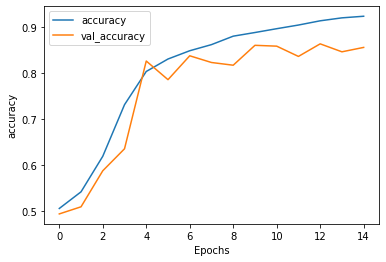

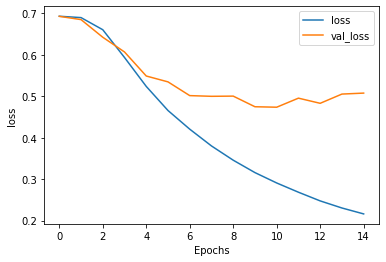

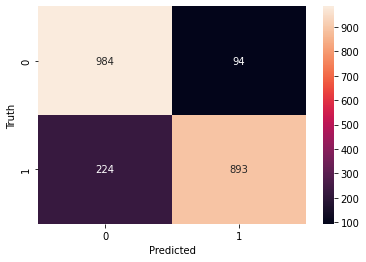

              precision    recall  f1-score   support

       False       0.81      0.91      0.86      1078
        True       0.90      0.80      0.85      1117

    accuracy                           0.86      2195
   macro avg       0.86      0.86      0.85      2195
weighted avg       0.86      0.86      0.85      2195

             !!!!!  split number : 2  !!!!!
     In training: Counter({True: 9905, False: 9842})
     In testing: Counter({False: 1129, True: 1066})
Epoch 1/15
618/618 - 10s - loss: 0.6928 - accuracy: 0.5089 - precision: 0.5099 - recall: 0.5430 - val_loss: 0.6921 - val_accuracy: 0.5244 - val_precision: 0.5054 - val_recall: 0.9662 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6881 - accuracy: 0.5410 - precision: 0.5393 - recall: 0.5832 - val_loss: 0.6776 - val_accuracy: 0.5927 - val_precision: 0.9886 - val_recall: 0.1632 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 9s - loss: 0.6493 - accuracy: 0.6493 - precision: 0.6409 - recall: 0.6841 - val_loss: 0.625

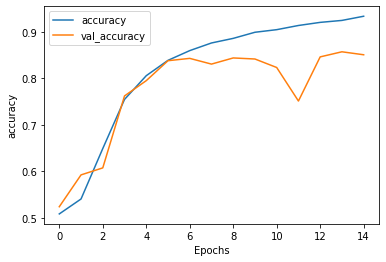

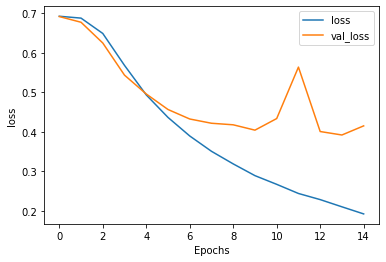

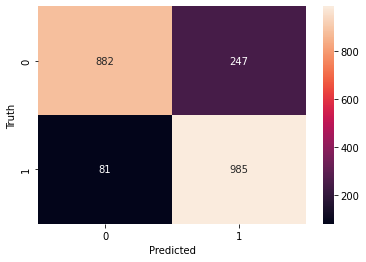

              precision    recall  f1-score   support

       False       0.92      0.78      0.84      1129
        True       0.80      0.92      0.86      1066

    accuracy                           0.85      2195
   macro avg       0.86      0.85      0.85      2195
weighted avg       0.86      0.85      0.85      2195

             !!!!!  split number : 3  !!!!!
     In training: Counter({True: 9881, False: 9867})
     In testing: Counter({False: 1104, True: 1090})
Epoch 1/15
618/618 - 10s - loss: 0.6932 - accuracy: 0.4991 - precision: 0.4994 - recall: 0.4873 - val_loss: 0.6928 - val_accuracy: 0.5032 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 10s/epoch - 17ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6900 - accuracy: 0.5333 - precision: 0.5346 - recall: 0.5185 - val_loss: 0.6825 - val_accuracy: 0.5565 - val_precision: 0.5305 - val_recall: 0.9330 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 9s - loss: 0.6649 - accuracy: 0.6063 - precision: 0.5977 - recall: 0.6522 - val_los

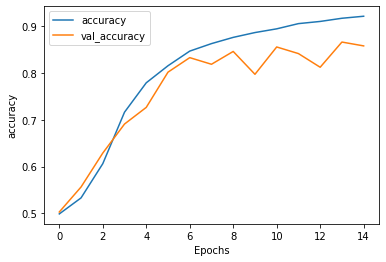

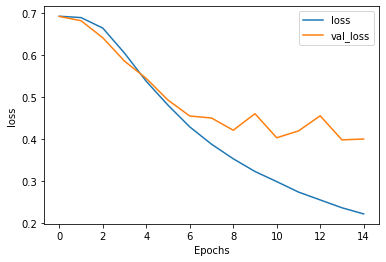

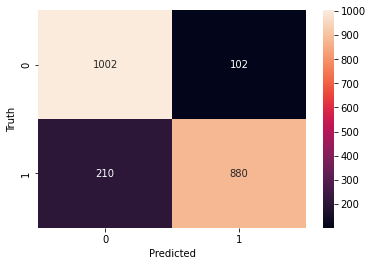

              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1104
        True       0.90      0.81      0.85      1090

    accuracy                           0.86      2194
   macro avg       0.86      0.86      0.86      2194
weighted avg       0.86      0.86      0.86      2194

             !!!!!  split number : 4  !!!!!
     In training: Counter({True: 9883, False: 9865})
     In testing: Counter({False: 1106, True: 1088})
Epoch 1/15
618/618 - 10s - loss: 0.6929 - accuracy: 0.5084 - precision: 0.5091 - recall: 0.4977 - val_loss: 0.6922 - val_accuracy: 0.5046 - val_precision: 1.0000 - val_recall: 9.1912e-04 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 8s - loss: 0.6885 - accuracy: 0.5398 - precision: 0.5389 - recall: 0.5561 - val_loss: 0.6791 - val_accuracy: 0.5889 - val_precision: 0.9697 - val_recall: 0.1765 - 8s/epoch - 14ms/step
Epoch 3/15
618/618 - 8s - loss: 0.6532 - accuracy: 0.6361 - precision: 0.6278 - recall: 0.6703 - val_loss: 0

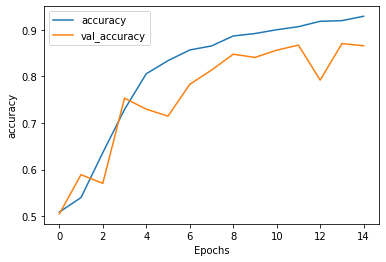

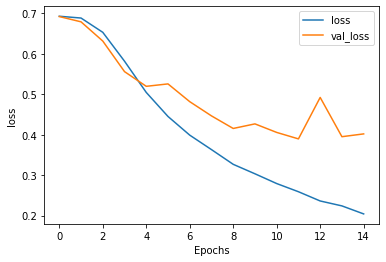

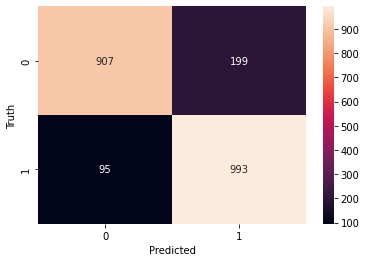

              precision    recall  f1-score   support

       False       0.91      0.82      0.86      1106
        True       0.83      0.91      0.87      1088

    accuracy                           0.87      2194
   macro avg       0.87      0.87      0.87      2194
weighted avg       0.87      0.87      0.87      2194

             !!!!!  split number : 5  !!!!!
     In training: Counter({False: 9876, True: 9872})
     In testing: Counter({True: 1099, False: 1095})
Epoch 1/15
618/618 - 10s - loss: 0.6930 - accuracy: 0.5072 - precision: 0.5067 - recall: 0.5348 - val_loss: 0.6915 - val_accuracy: 0.7589 - val_precision: 0.7491 - val_recall: 0.7798 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6875 - accuracy: 0.5545 - precision: 0.5536 - recall: 0.5626 - val_loss: 0.6791 - val_accuracy: 0.5228 - val_precision: 0.9643 - val_recall: 0.0491 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 9s - loss: 0.6593 - accuracy: 0.6340 - precision: 0.6219 - recall: 0.6830 - val_loss: 0.628

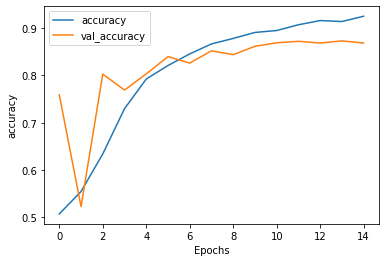

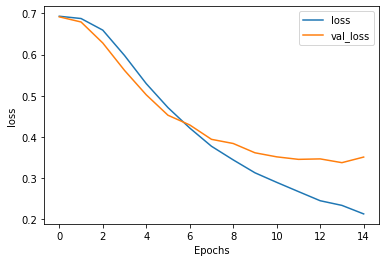

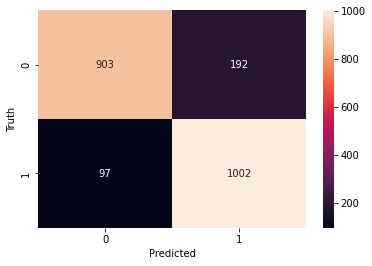

              precision    recall  f1-score   support

       False       0.90      0.82      0.86      1095
        True       0.84      0.91      0.87      1099

    accuracy                           0.87      2194
   macro avg       0.87      0.87      0.87      2194
weighted avg       0.87      0.87      0.87      2194

             !!!!!  split number : 6  !!!!!
     In training: Counter({True: 9882, False: 9866})
     In testing: Counter({False: 1105, True: 1089})
Epoch 1/15
618/618 - 10s - loss: 0.6929 - accuracy: 0.5056 - precision: 0.5056 - recall: 0.5428 - val_loss: 0.6921 - val_accuracy: 0.5036 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6885 - accuracy: 0.5393 - precision: 0.5420 - recall: 0.5126 - val_loss: 0.6826 - val_accuracy: 0.5337 - val_precision: 0.9583 - val_recall: 0.0634 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 9s - loss: 0.6551 - accuracy: 0.6392 - precision: 0.6197 - recall: 0.7222 - val_los

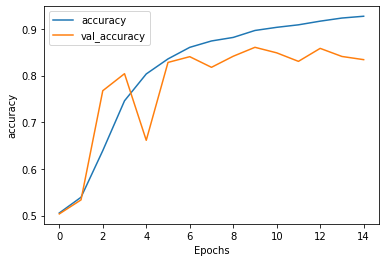

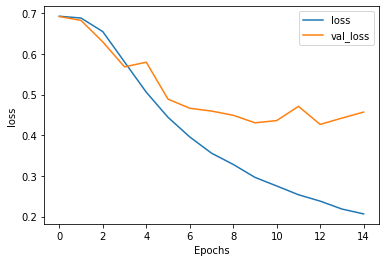

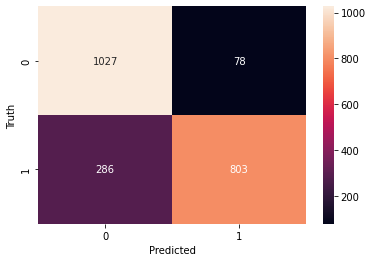

              precision    recall  f1-score   support

       False       0.78      0.93      0.85      1105
        True       0.91      0.74      0.82      1089

    accuracy                           0.83      2194
   macro avg       0.85      0.83      0.83      2194
weighted avg       0.85      0.83      0.83      2194

             !!!!!  split number : 7  !!!!!
     In training: Counter({True: 9880, False: 9868})
     In testing: Counter({False: 1103, True: 1091})
Epoch 1/15
618/618 - 10s - loss: 0.6930 - accuracy: 0.5086 - precision: 0.5111 - recall: 0.4113 - val_loss: 0.6925 - val_accuracy: 0.5123 - val_precision: 0.5049 - val_recall: 0.9844 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6905 - accuracy: 0.5329 - precision: 0.5352 - recall: 0.5047 - val_loss: 0.6852 - val_accuracy: 0.5871 - val_precision: 0.5497 - val_recall: 0.9377 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 8s - loss: 0.6710 - accuracy: 0.5971 - precision: 0.5935 - recall: 0.6175 - val_loss: 0.651

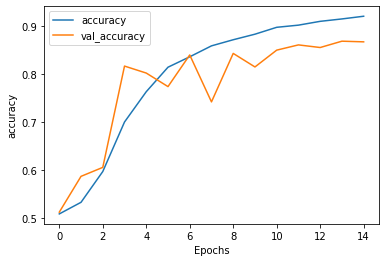

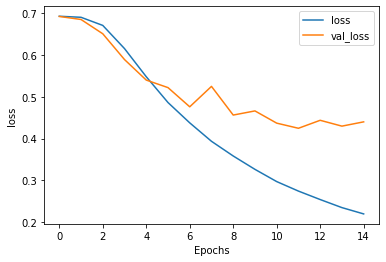

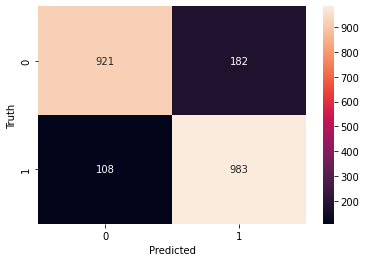

              precision    recall  f1-score   support

       False       0.90      0.83      0.86      1103
        True       0.84      0.90      0.87      1091

    accuracy                           0.87      2194
   macro avg       0.87      0.87      0.87      2194
weighted avg       0.87      0.87      0.87      2194

             !!!!!  split number : 8  !!!!!
     In training: Counter({False: 9895, True: 9853})
     In testing: Counter({True: 1118, False: 1076})
Epoch 1/15
618/618 - 10s - loss: 0.6930 - accuracy: 0.5025 - precision: 0.5015 - recall: 0.4850 - val_loss: 0.6919 - val_accuracy: 0.5210 - val_precision: 0.5158 - val_recall: 0.9785 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 8s - loss: 0.6881 - accuracy: 0.5476 - precision: 0.5452 - recall: 0.5626 - val_loss: 0.6784 - val_accuracy: 0.5506 - val_precision: 0.5332 - val_recall: 0.9472 - 8s/epoch - 14ms/step
Epoch 3/15
618/618 - 8s - loss: 0.6525 - accuracy: 0.6300 - precision: 0.6133 - recall: 0.6995 - val_loss: 0.619

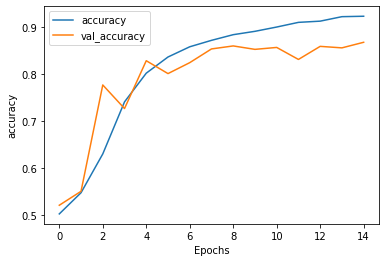

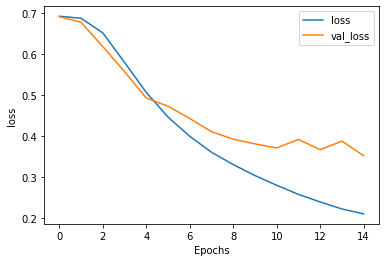

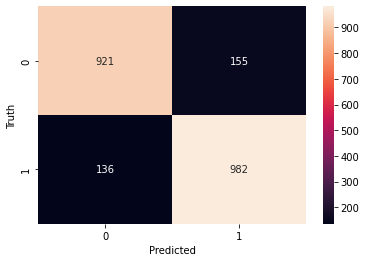

              precision    recall  f1-score   support

       False       0.87      0.86      0.86      1076
        True       0.86      0.88      0.87      1118

    accuracy                           0.87      2194
   macro avg       0.87      0.87      0.87      2194
weighted avg       0.87      0.87      0.87      2194

             !!!!!  split number : 9  !!!!!
     In training: Counter({False: 9881, True: 9867})
     In testing: Counter({True: 1104, False: 1090})
Epoch 1/15
618/618 - 10s - loss: 0.6931 - accuracy: 0.5052 - precision: 0.5060 - recall: 0.4072 - val_loss: 0.6923 - val_accuracy: 0.5301 - val_precision: 0.5174 - val_recall: 0.9846 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 8s - loss: 0.6880 - accuracy: 0.5444 - precision: 0.5387 - recall: 0.6144 - val_loss: 0.6773 - val_accuracy: 0.5579 - val_precision: 0.5337 - val_recall: 0.9620 - 8s/epoch - 14ms/step
Epoch 3/15
618/618 - 8s - loss: 0.6536 - accuracy: 0.6398 - precision: 0.6240 - recall: 0.7021 - val_loss: 0.627

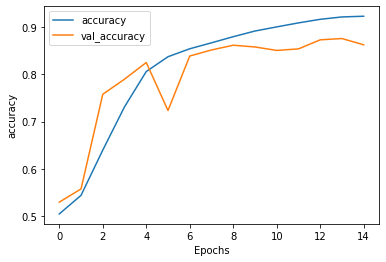

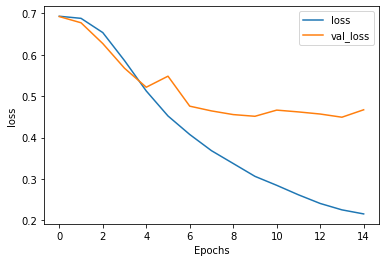

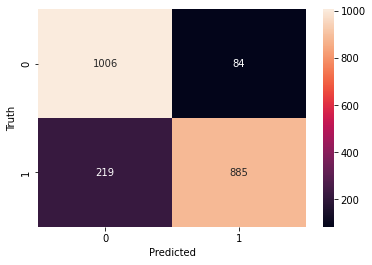

              precision    recall  f1-score   support

       False       0.82      0.92      0.87      1090
        True       0.91      0.80      0.85      1104

    accuracy                           0.86      2194
   macro avg       0.87      0.86      0.86      2194
weighted avg       0.87      0.86      0.86      2194

             !!!!!  split number : 10  !!!!!
     In training: Counter({False: 9886, True: 9862})
     In testing: Counter({True: 1109, False: 1085})
Epoch 1/15
618/618 - 10s - loss: 0.6931 - accuracy: 0.5015 - precision: 0.5009 - recall: 0.4919 - val_loss: 0.6927 - val_accuracy: 0.4945 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 8s - loss: 0.6892 - accuracy: 0.5359 - precision: 0.5346 - recall: 0.5453 - val_loss: 0.6830 - val_accuracy: 0.5132 - val_precision: 1.0000 - val_recall: 0.0370 - 8s/epoch - 13ms/step
Epoch 3/15
618/618 - 8s - loss: 0.6625 - accuracy: 0.6159 - precision: 0.6031 - recall: 0.6749 - val_lo

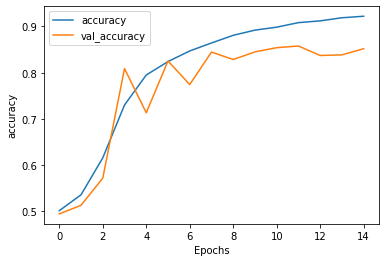

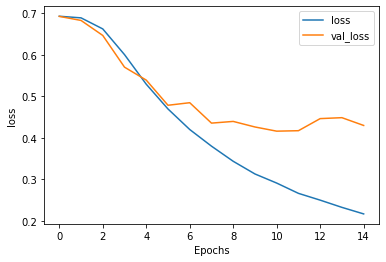

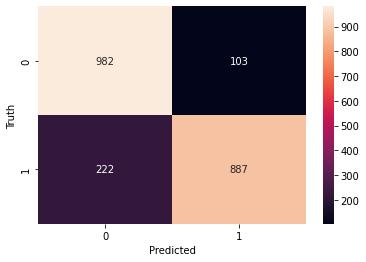

              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1085
        True       0.90      0.80      0.85      1109

    accuracy                           0.85      2194
   macro avg       0.86      0.85      0.85      2194
weighted avg       0.86      0.85      0.85      2194

mean accuracy for this sub_experiment is 0.86
mean recall for this sub_experiment is 0.85
mean precision for this sub_experiment is 0.87
mean f1_score for this sub_experiment is 0.86
------------------------------------------------------------
!!!!!  sub-experiment with keras sequential model number 2  !!!!!
!!!!!  dataset used is : article and tweets without cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({False: 9902, True: 9847})
     In testing: Counter({True: 1125, False: 1070})
Epoch 1/15
618/618 - 10s - loss: 0.6927 - accuracy: 0.5092 - precision: 0.5085 - reca

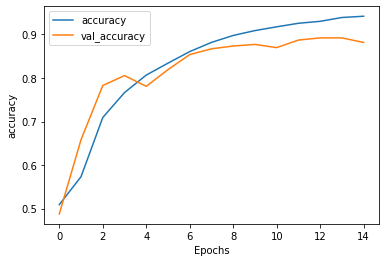

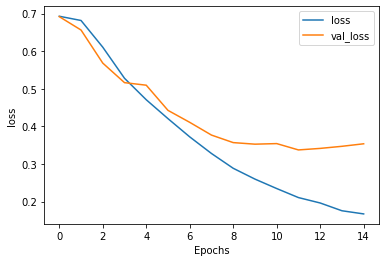

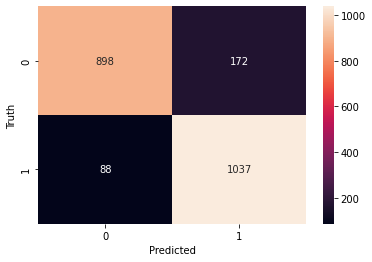

              precision    recall  f1-score   support

       False       0.91      0.84      0.87      1070
        True       0.86      0.92      0.89      1125

    accuracy                           0.88      2195
   macro avg       0.88      0.88      0.88      2195
weighted avg       0.88      0.88      0.88      2195

             !!!!!  split number : 2  !!!!!
     In training: Counter({True: 9889, False: 9860})
     In testing: Counter({False: 1112, True: 1083})
Epoch 1/15
618/618 - 10s - loss: 0.6920 - accuracy: 0.5236 - precision: 0.5208 - recall: 0.6088 - val_loss: 0.6884 - val_accuracy: 0.5253 - val_precision: 0.5108 - val_recall: 0.8929 - 10s/epoch - 17ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6704 - accuracy: 0.5981 - precision: 0.5919 - recall: 0.6354 - val_loss: 0.6372 - val_accuracy: 0.7376 - val_precision: 0.8205 - val_recall: 0.5993 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 9s - loss: 0.5915 - accuracy: 0.7197 - precision: 0.7361 - recall: 0.6861 - val_loss: 0.561

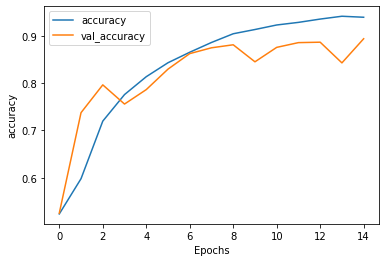

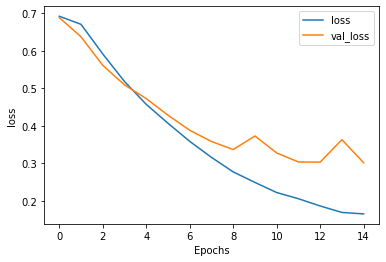

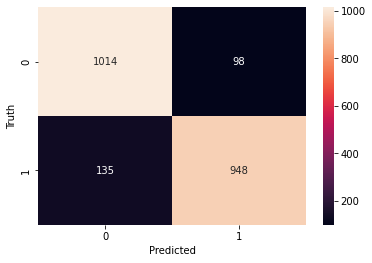

              precision    recall  f1-score   support

       False       0.88      0.91      0.90      1112
        True       0.91      0.88      0.89      1083

    accuracy                           0.89      2195
   macro avg       0.89      0.89      0.89      2195
weighted avg       0.89      0.89      0.89      2195

             !!!!!  split number : 3  !!!!!
     In training: Counter({False: 9898, True: 9851})
     In testing: Counter({True: 1121, False: 1074})
Epoch 1/15
618/618 - 10s - loss: 0.6928 - accuracy: 0.5098 - precision: 0.5100 - recall: 0.4436 - val_loss: 0.6931 - val_accuracy: 0.4893 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6821 - accuracy: 0.5668 - precision: 0.5639 - recall: 0.5801 - val_loss: 0.6560 - val_accuracy: 0.6888 - val_precision: 0.6276 - val_recall: 0.9607 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 9s - loss: 0.6091 - accuracy: 0.7120 - precision: 0.7241 - recall: 0.6829 - val_los

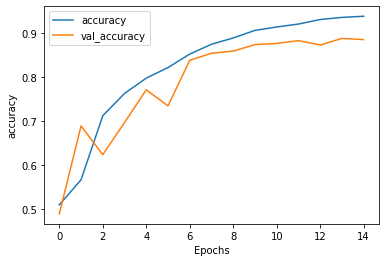

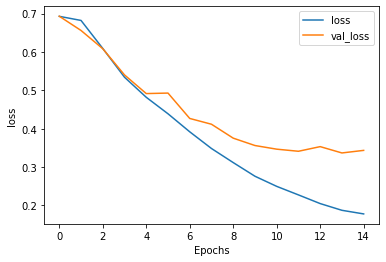

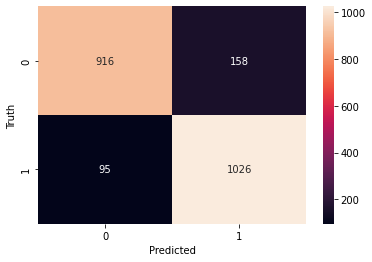

              precision    recall  f1-score   support

       False       0.91      0.85      0.88      1074
        True       0.87      0.92      0.89      1121

    accuracy                           0.88      2195
   macro avg       0.89      0.88      0.88      2195
weighted avg       0.89      0.88      0.88      2195

             !!!!!  split number : 4  !!!!!
     In training: Counter({False: 9885, True: 9864})
     In testing: Counter({True: 1108, False: 1087})
Epoch 1/15
618/618 - 10s - loss: 0.6929 - accuracy: 0.5033 - precision: 0.5024 - recall: 0.5882 - val_loss: 0.6920 - val_accuracy: 0.4970 - val_precision: 0.7000 - val_recall: 0.0063 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6850 - accuracy: 0.5799 - precision: 0.5626 - recall: 0.7142 - val_loss: 0.6648 - val_accuracy: 0.5932 - val_precision: 0.5561 - val_recall: 0.9612 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 9s - loss: 0.6231 - accuracy: 0.6943 - precision: 0.6933 - recall: 0.6956 - val_loss: 0.572

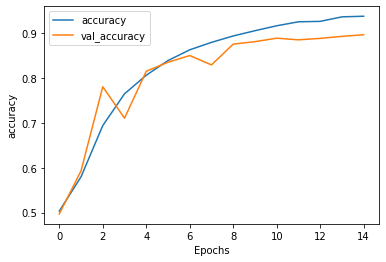

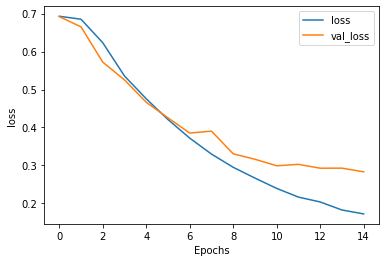

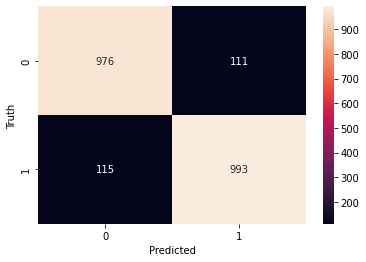

              precision    recall  f1-score   support

       False       0.89      0.90      0.90      1087
        True       0.90      0.90      0.90      1108

    accuracy                           0.90      2195
   macro avg       0.90      0.90      0.90      2195
weighted avg       0.90      0.90      0.90      2195

             !!!!!  split number : 5  !!!!!
     In training: Counter({False: 9879, True: 9871})
     In testing: Counter({True: 1101, False: 1093})
Epoch 1/15
618/618 - 10s - loss: 0.6925 - accuracy: 0.5123 - precision: 0.5108 - recall: 0.5695 - val_loss: 0.6910 - val_accuracy: 0.5155 - val_precision: 0.5092 - val_recall: 0.9546 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6818 - accuracy: 0.5668 - precision: 0.5612 - recall: 0.6110 - val_loss: 0.6634 - val_accuracy: 0.6349 - val_precision: 0.8348 - val_recall: 0.3397 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 9s - loss: 0.6151 - accuracy: 0.7022 - precision: 0.7080 - recall: 0.6878 - val_loss: 0.585

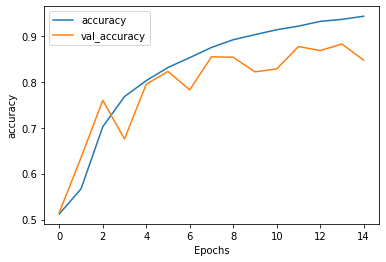

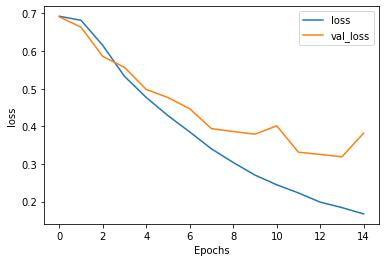

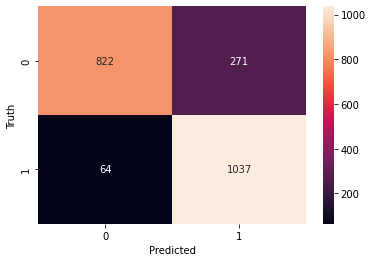

              precision    recall  f1-score   support

       False       0.93      0.75      0.83      1093
        True       0.79      0.94      0.86      1101

    accuracy                           0.85      2194
   macro avg       0.86      0.85      0.85      2194
weighted avg       0.86      0.85      0.85      2194

             !!!!!  split number : 6  !!!!!
     In training: Counter({True: 9896, False: 9854})
     In testing: Counter({False: 1118, True: 1076})
Epoch 1/15
618/618 - 10s - loss: 0.6922 - accuracy: 0.5183 - precision: 0.5171 - recall: 0.5860 - val_loss: 0.6908 - val_accuracy: 0.5100 - val_precision: 1.0000 - val_recall: 9.2937e-04 - 10s/epoch - 16ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6806 - accuracy: 0.5694 - precision: 0.5641 - recall: 0.6184 - val_loss: 0.6639 - val_accuracy: 0.6367 - val_precision: 0.5813 - val_recall: 0.9266 - 9s/epoch - 15ms/step
Epoch 3/15
618/618 - 9s - loss: 0.6221 - accuracy: 0.7008 - precision: 0.6987 - recall: 0.7083 - val_loss: 0

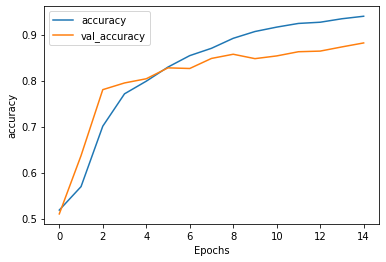

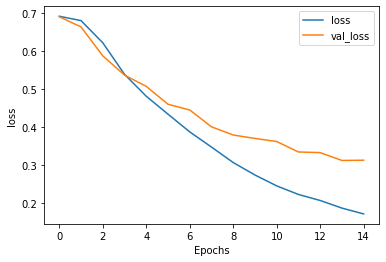

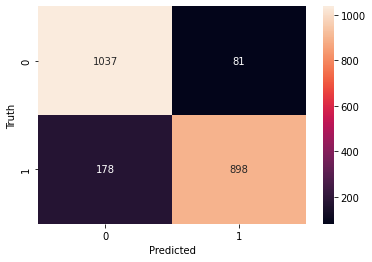

              precision    recall  f1-score   support

       False       0.85      0.93      0.89      1118
        True       0.92      0.83      0.87      1076

    accuracy                           0.88      2194
   macro avg       0.89      0.88      0.88      2194
weighted avg       0.88      0.88      0.88      2194

             !!!!!  split number : 7  !!!!!
     In training: Counter({True: 9928, False: 9822})
     In testing: Counter({False: 1150, True: 1044})
Epoch 1/15
618/618 - 11s - loss: 0.6923 - accuracy: 0.5201 - precision: 0.5170 - recall: 0.6894 - val_loss: 0.6908 - val_accuracy: 0.5109 - val_precision: 0.4927 - val_recall: 0.9358 - 11s/epoch - 18ms/step
Epoch 2/15
618/618 - 11s - loss: 0.6693 - accuracy: 0.6012 - precision: 0.5852 - recall: 0.7094 - val_loss: 0.6303 - val_accuracy: 0.6513 - val_precision: 0.8329 - val_recall: 0.3343 - 11s/epoch - 18ms/step
Epoch 3/15
618/618 - 10s - loss: 0.5773 - accuracy: 0.7330 - precision: 0.7480 - recall: 0.7069 - val_loss: 0.

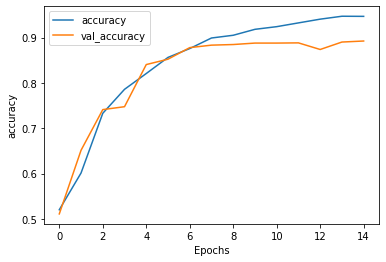

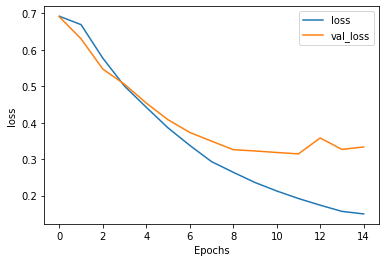

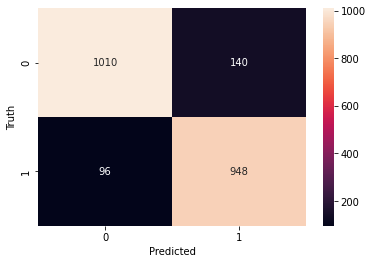

              precision    recall  f1-score   support

       False       0.91      0.88      0.90      1150
        True       0.87      0.91      0.89      1044

    accuracy                           0.89      2194
   macro avg       0.89      0.89      0.89      2194
weighted avg       0.89      0.89      0.89      2194

             !!!!!  split number : 8  !!!!!
     In training: Counter({False: 9887, True: 9863})
     In testing: Counter({True: 1109, False: 1085})
Epoch 1/15
618/618 - 10s - loss: 0.6923 - accuracy: 0.5132 - precision: 0.5109 - recall: 0.5917 - val_loss: 0.6906 - val_accuracy: 0.4950 - val_precision: 1.0000 - val_recall: 9.0171e-04 - 10s/epoch - 17ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6766 - accuracy: 0.5893 - precision: 0.5733 - recall: 0.6950 - val_loss: 0.6459 - val_accuracy: 0.7785 - val_precision: 0.7205 - val_recall: 0.9179 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 9s - loss: 0.5920 - accuracy: 0.7162 - precision: 0.7250 - recall: 0.6953 - val_loss: 0

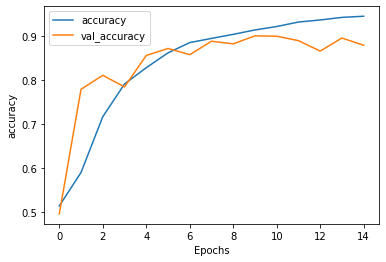

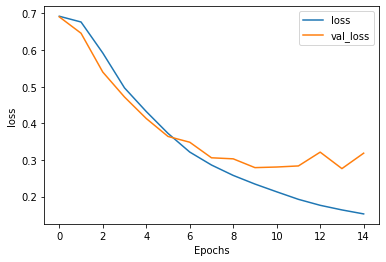

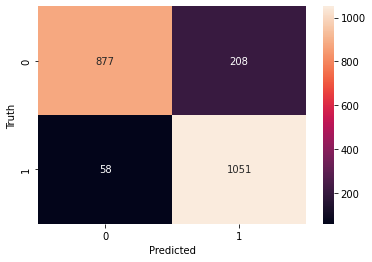

              precision    recall  f1-score   support

       False       0.94      0.81      0.87      1085
        True       0.83      0.95      0.89      1109

    accuracy                           0.88      2194
   macro avg       0.89      0.88      0.88      2194
weighted avg       0.89      0.88      0.88      2194

             !!!!!  split number : 9  !!!!!
     In training: Counter({True: 9877, False: 9873})
     In testing: Counter({False: 1099, True: 1095})
Epoch 1/15
618/618 - 10s - loss: 0.6927 - accuracy: 0.5070 - precision: 0.5071 - recall: 0.5063 - val_loss: 0.6912 - val_accuracy: 0.5087 - val_precision: 0.8696 - val_recall: 0.0183 - 10s/epoch - 17ms/step
Epoch 2/15
618/618 - 9s - loss: 0.6848 - accuracy: 0.5649 - precision: 0.5541 - recall: 0.6651 - val_loss: 0.6690 - val_accuracy: 0.5930 - val_precision: 0.9040 - val_recall: 0.2064 - 9s/epoch - 14ms/step
Epoch 3/15
618/618 - 9s - loss: 0.6302 - accuracy: 0.6799 - precision: 0.6780 - recall: 0.6857 - val_loss: 0.581

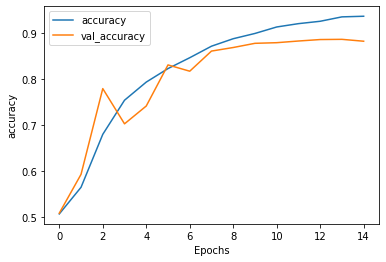

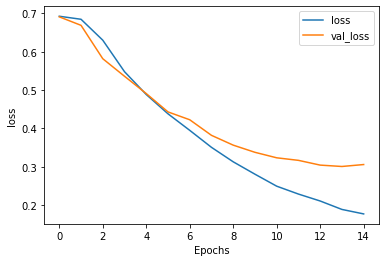

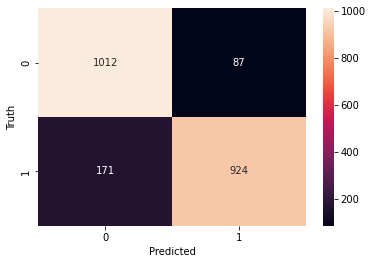

              precision    recall  f1-score   support

       False       0.86      0.92      0.89      1099
        True       0.91      0.84      0.88      1095

    accuracy                           0.88      2194
   macro avg       0.88      0.88      0.88      2194
weighted avg       0.88      0.88      0.88      2194

             !!!!!  split number : 10  !!!!!
     In training: Counter({False: 9888, True: 9862})
     In testing: Counter({True: 1110, False: 1084})
Epoch 1/15
618/618 - 14s - loss: 0.6924 - accuracy: 0.5132 - precision: 0.5150 - recall: 0.4296 - val_loss: 0.6909 - val_accuracy: 0.5324 - val_precision: 0.5203 - val_recall: 0.9685 - 14s/epoch - 23ms/step
Epoch 2/15
618/618 - 13s - loss: 0.6756 - accuracy: 0.5912 - precision: 0.5846 - recall: 0.6265 - val_loss: 0.6496 - val_accuracy: 0.6135 - val_precision: 0.8579 - val_recall: 0.2829 - 13s/epoch - 21ms/step
Epoch 3/15
618/618 - 13s - loss: 0.5991 - accuracy: 0.7110 - precision: 0.7257 - recall: 0.6771 - val_loss: 0

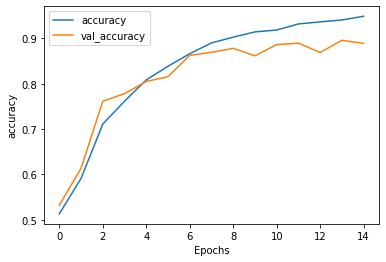

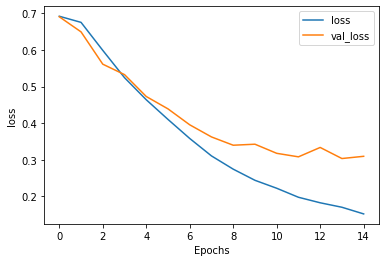

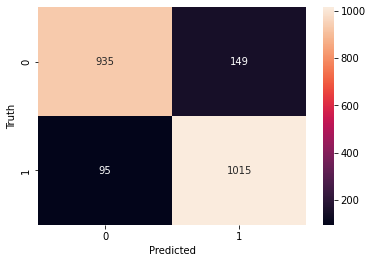

              precision    recall  f1-score   support

       False       0.91      0.86      0.88      1084
        True       0.87      0.91      0.89      1110

    accuracy                           0.89      2194
   macro avg       0.89      0.89      0.89      2194
weighted avg       0.89      0.89      0.89      2194

mean accuracy for this sub_experiment is 0.88
mean recall for this sub_experiment is 0.9
mean precision for this sub_experiment is 0.87
mean f1_score for this sub_experiment is 0.88
------------------------------------------------------------
!!!!!  sub-experiment with keras sequential model number 3  
!!!!!  dataset used is : tweets with cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({False: 8936, True: 8929})
     In testing: Counter({True: 996, False: 989})
Epoch 1/15
559/559 - 9s - loss: 0.6601 - accuracy: 0.6345 - precision: 0.7220 - recall: 0.4371 - val_loss: 0

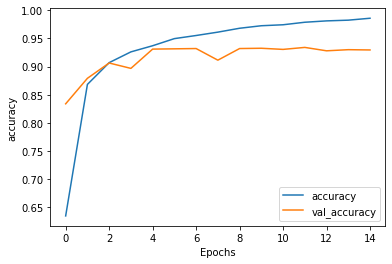

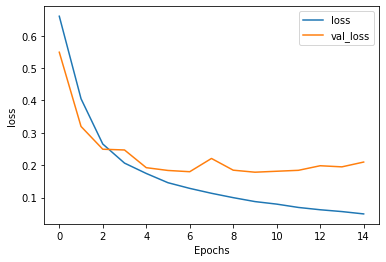

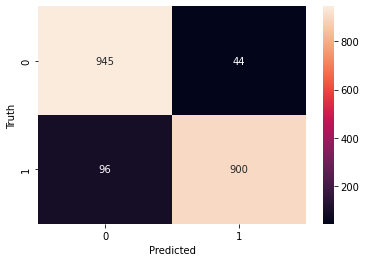

              precision    recall  f1-score   support

       False       0.91      0.96      0.93       989
        True       0.95      0.90      0.93       996

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

             !!!!!  split number : 2  !!!!!
     In training: Counter({True: 8938, False: 8927})
     In testing: Counter({False: 998, True: 987})
Epoch 1/15
559/559 - 7s - loss: 0.6725 - accuracy: 0.6257 - precision: 0.6239 - recall: 0.6344 - val_loss: 0.5904 - val_accuracy: 0.8469 - val_precision: 0.8645 - val_recall: 0.8207 - 7s/epoch - 13ms/step
Epoch 2/15
559/559 - 6s - loss: 0.4376 - accuracy: 0.8574 - precision: 0.8763 - recall: 0.8324 - val_loss: 0.3595 - val_accuracy: 0.8625 - val_precision: 0.8205 - val_recall: 0.9260 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2795 - accuracy: 0.9027 - precision: 0.9070 - recall: 0.8976 - val_loss: 0.2833 - 

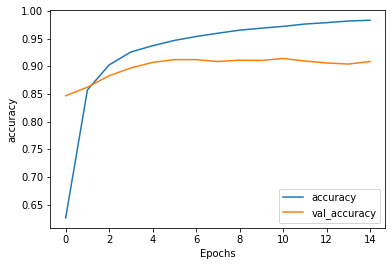

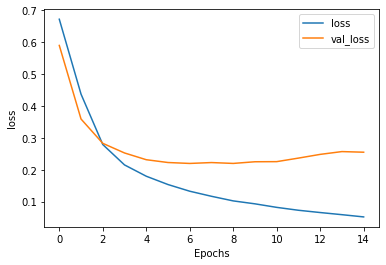

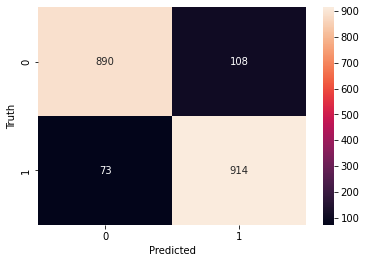

              precision    recall  f1-score   support

       False       0.92      0.89      0.91       998
        True       0.89      0.93      0.91       987

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 3  !!!!!
     In training: Counter({True: 8950, False: 8915})
     In testing: Counter({False: 1010, True: 975})
Epoch 1/15
559/559 - 7s - loss: 0.6711 - accuracy: 0.6250 - precision: 0.6444 - recall: 0.5612 - val_loss: 0.5819 - val_accuracy: 0.8554 - val_precision: 0.8454 - val_recall: 0.8636 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 6s - loss: 0.4197 - accuracy: 0.8583 - precision: 0.8773 - recall: 0.8339 - val_loss: 0.3397 - val_accuracy: 0.8635 - val_precision: 0.8982 - val_recall: 0.8144 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 5s - loss: 0.2675 - accuracy: 0.9075 - precision: 0.9114 - recall: 0.9032 - val_loss: 0.2828 -

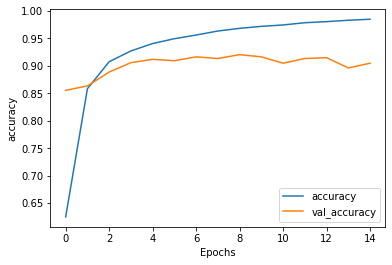

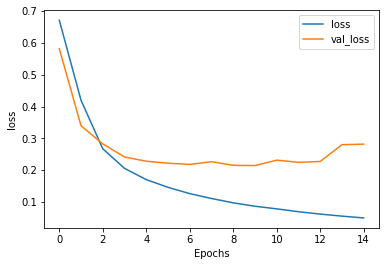

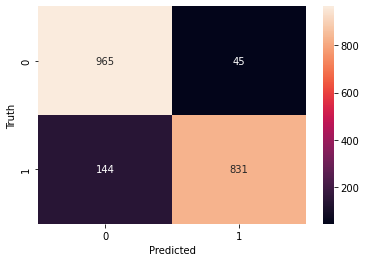

              precision    recall  f1-score   support

       False       0.87      0.96      0.91      1010
        True       0.95      0.85      0.90       975

    accuracy                           0.90      1985
   macro avg       0.91      0.90      0.90      1985
weighted avg       0.91      0.90      0.90      1985

             !!!!!  split number : 4  !!!!!
     In training: Counter({True: 8933, False: 8932})
     In testing: Counter({False: 993, True: 992})
Epoch 1/15
559/559 - 7s - loss: 0.6780 - accuracy: 0.6024 - precision: 0.5772 - recall: 0.7656 - val_loss: 0.6178 - val_accuracy: 0.7239 - val_precision: 0.9644 - val_recall: 0.4647 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 5s - loss: 0.4722 - accuracy: 0.8405 - precision: 0.8675 - recall: 0.8039 - val_loss: 0.3681 - val_accuracy: 0.8574 - val_precision: 0.9146 - val_recall: 0.7883 - 5s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.3026 - accuracy: 0.8924 - precision: 0.8967 - recall: 0.8869 - val_loss: 0.2793 - 

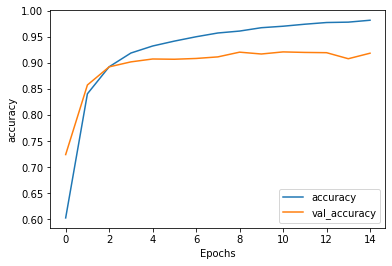

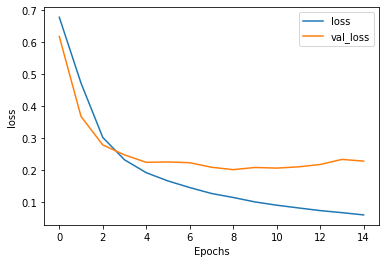

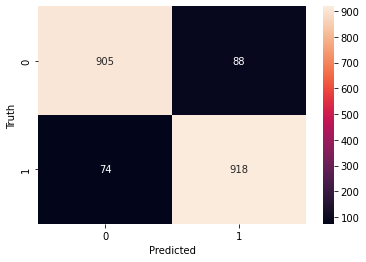

              precision    recall  f1-score   support

       False       0.92      0.91      0.92       993
        True       0.91      0.93      0.92       992

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 5  !!!!!
     In training: Counter({True: 8943, False: 8922})
     In testing: Counter({False: 1003, True: 982})
Epoch 1/15
559/559 - 7s - loss: 0.6722 - accuracy: 0.6243 - precision: 0.6130 - recall: 0.6766 - val_loss: 0.5920 - val_accuracy: 0.8267 - val_precision: 0.9132 - val_recall: 0.7179 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 5s - loss: 0.4307 - accuracy: 0.8618 - precision: 0.8825 - recall: 0.8351 - val_loss: 0.3356 - val_accuracy: 0.8806 - val_precision: 0.8766 - val_recall: 0.8829 - 5s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2672 - accuracy: 0.9076 - precision: 0.9112 - recall: 0.9035 - val_loss: 0.2688 -

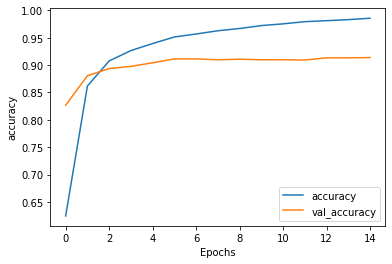

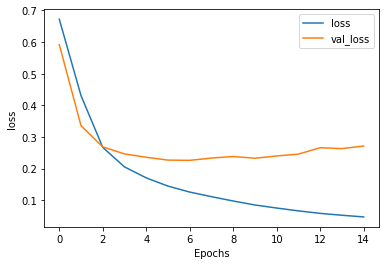

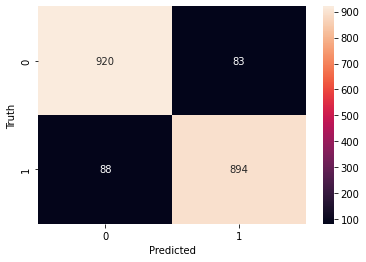

              precision    recall  f1-score   support

       False       0.91      0.92      0.91      1003
        True       0.92      0.91      0.91       982

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 6  !!!!!
     In training: Counter({False: 8953, True: 8912})
     In testing: Counter({True: 1013, False: 972})
Epoch 1/15
559/559 - 8s - loss: 0.6583 - accuracy: 0.6230 - precision: 0.6986 - recall: 0.4296 - val_loss: 0.5410 - val_accuracy: 0.8277 - val_precision: 0.7656 - val_recall: 0.9546 - 8s/epoch - 15ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3970 - accuracy: 0.8646 - precision: 0.8806 - recall: 0.8428 - val_loss: 0.3182 - val_accuracy: 0.8720 - val_precision: 0.9397 - val_recall: 0.8006 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2585 - accuracy: 0.9090 - precision: 0.9110 - recall: 0.9061 - val_loss: 0.2496 -

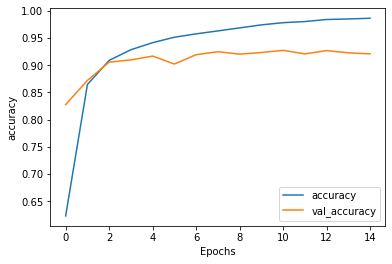

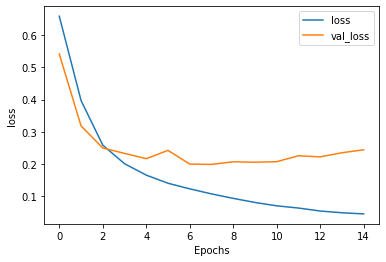

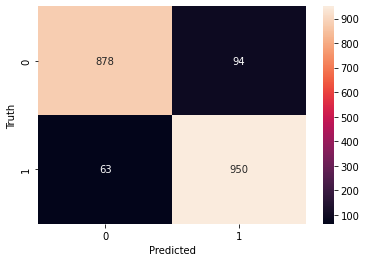

              precision    recall  f1-score   support

       False       0.93      0.90      0.92       972
        True       0.91      0.94      0.92      1013

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 7  !!!!!
     In training: Counter({False: 8942, True: 8923})
     In testing: Counter({True: 1002, False: 983})
Epoch 1/15
559/559 - 7s - loss: 0.6724 - accuracy: 0.6363 - precision: 0.6273 - recall: 0.6696 - val_loss: 0.5925 - val_accuracy: 0.7098 - val_precision: 0.9551 - val_recall: 0.4461 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 6s - loss: 0.4222 - accuracy: 0.8602 - precision: 0.8736 - recall: 0.8419 - val_loss: 0.3314 - val_accuracy: 0.8811 - val_precision: 0.8924 - val_recall: 0.8693 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2655 - accuracy: 0.9056 - precision: 0.9083 - recall: 0.9021 - val_loss: 0.2646 -

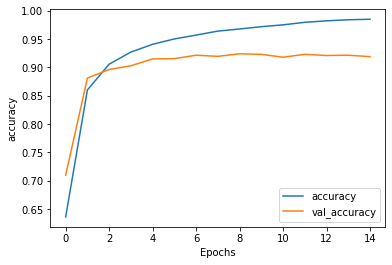

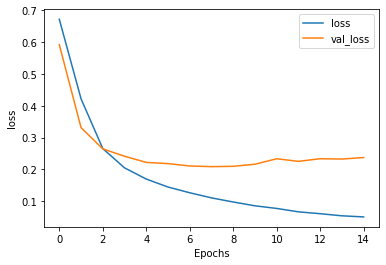

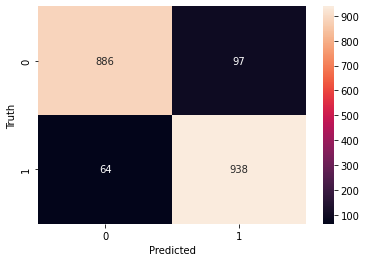

              precision    recall  f1-score   support

       False       0.93      0.90      0.92       983
        True       0.91      0.94      0.92      1002

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 8  !!!!!
     In training: Counter({False: 8940, True: 8925})
     In testing: Counter({True: 1000, False: 985})
Epoch 1/15
559/559 - 6s - loss: 0.6737 - accuracy: 0.6275 - precision: 0.6636 - recall: 0.5159 - val_loss: 0.6013 - val_accuracy: 0.8615 - val_precision: 0.8733 - val_recall: 0.8480 - 6s/epoch - 12ms/step
Epoch 2/15
559/559 - 5s - loss: 0.4495 - accuracy: 0.8485 - precision: 0.8731 - recall: 0.8151 - val_loss: 0.3494 - val_accuracy: 0.8786 - val_precision: 0.8453 - val_recall: 0.9290 - 5s/epoch - 9ms/step
Epoch 3/15
559/559 - 5s - loss: 0.2791 - accuracy: 0.9006 - precision: 0.9046 - recall: 0.8955 - val_loss: 0.2702 - 

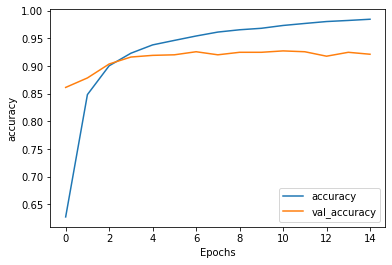

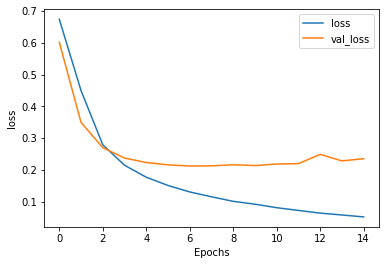

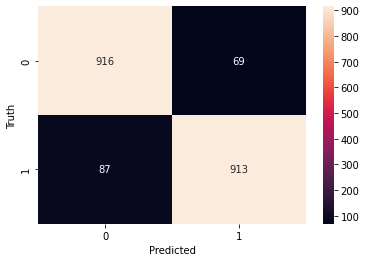

              precision    recall  f1-score   support

       False       0.91      0.93      0.92       985
        True       0.93      0.91      0.92      1000

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 9  !!!!!
     In training: Counter({True: 8939, False: 8926})
     In testing: Counter({False: 999, True: 986})
Epoch 1/15
559/559 - 7s - loss: 0.6634 - accuracy: 0.6371 - precision: 0.6112 - recall: 0.7551 - val_loss: 0.5527 - val_accuracy: 0.8317 - val_precision: 0.9075 - val_recall: 0.7363 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 5s - loss: 0.4050 - accuracy: 0.8625 - precision: 0.8780 - recall: 0.8422 - val_loss: 0.3293 - val_accuracy: 0.8736 - val_precision: 0.8238 - val_recall: 0.9483 - 5s/epoch - 10ms/step
Epoch 3/15
559/559 - 5s - loss: 0.2603 - accuracy: 0.9070 - precision: 0.9081 - recall: 0.9058 - val_loss: 0.2554 - 

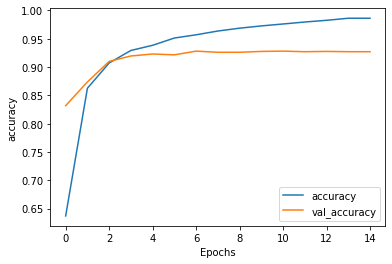

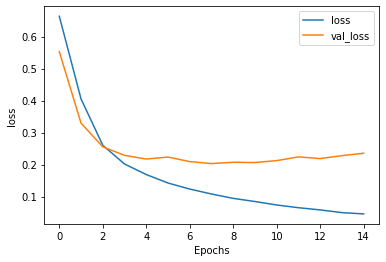

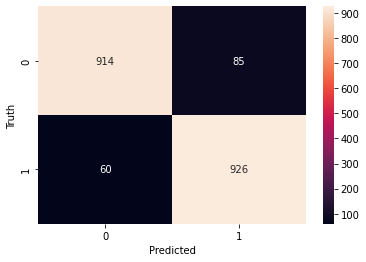

              precision    recall  f1-score   support

       False       0.94      0.91      0.93       999
        True       0.92      0.94      0.93       986

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

             !!!!!  split number : 10  !!!!!
     In training: Counter({True: 8933, False: 8932})
     In testing: Counter({False: 993, True: 992})
Epoch 1/15
559/559 - 7s - loss: 0.6649 - accuracy: 0.6373 - precision: 0.6281 - recall: 0.6736 - val_loss: 0.5768 - val_accuracy: 0.7416 - val_precision: 0.6644 - val_recall: 0.9758 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 6s - loss: 0.4130 - accuracy: 0.8682 - precision: 0.8857 - recall: 0.8456 - val_loss: 0.3416 - val_accuracy: 0.8715 - val_precision: 0.8933 - val_recall: 0.8438 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2657 - accuracy: 0.9084 - precision: 0.9103 - recall: 0.9060 - val_loss: 0.3027 -

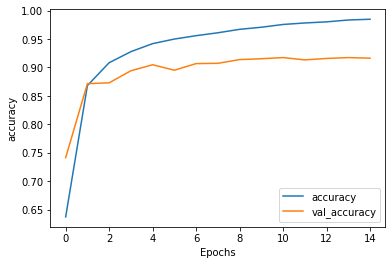

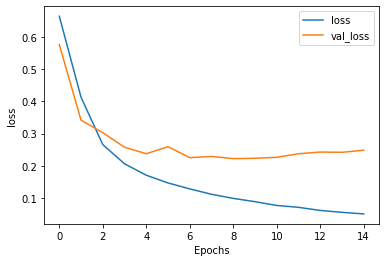

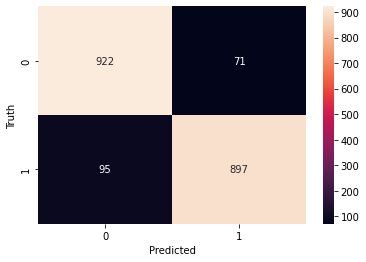

              precision    recall  f1-score   support

       False       0.91      0.93      0.92       993
        True       0.93      0.90      0.92       992

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

mean accuracy for this sub_experiment is 0.92
mean recall for this sub_experiment is 0.91
mean precision for this sub_experiment is 0.92
mean f1_score for this sub_experiment is 0.92
------------------------------------------------------------
!!!!!  sub-experiment with keras sequential model number 4  !!!!!
!!!!!  dataset used is : tweets without cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({False: 8942, True: 8924})
     In testing: Counter({True: 1002, False: 984})
Epoch 1/15
559/559 - 7s - loss: 0.6554 - accuracy: 0.6586 - precision: 0.6894 - recall: 0.5760 - v

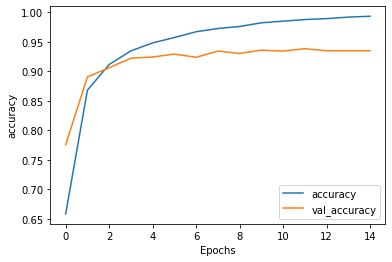

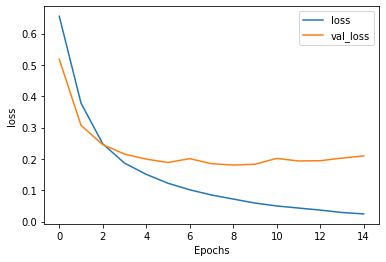

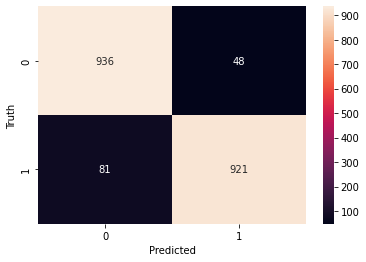

              precision    recall  f1-score   support

       False       0.92      0.95      0.94       984
        True       0.95      0.92      0.93      1002

    accuracy                           0.94      1986
   macro avg       0.94      0.94      0.94      1986
weighted avg       0.94      0.94      0.94      1986

             !!!!!  split number : 2  !!!!!
     In training: Counter({False: 8953, True: 8913})
     In testing: Counter({True: 1013, False: 973})
Epoch 1/15
559/559 - 7s - loss: 0.6134 - accuracy: 0.7013 - precision: 0.7406 - recall: 0.6177 - val_loss: 0.4367 - val_accuracy: 0.8469 - val_precision: 0.7937 - val_recall: 0.9457 - 7s/epoch - 13ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3301 - accuracy: 0.8822 - precision: 0.8818 - recall: 0.8822 - val_loss: 0.2815 - val_accuracy: 0.8917 - val_precision: 0.8661 - val_recall: 0.9319 - 6s/epoch - 11ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2207 - accuracy: 0.9219 - precision: 0.9202 - recall: 0.9235 - val_loss: 0.2284 -

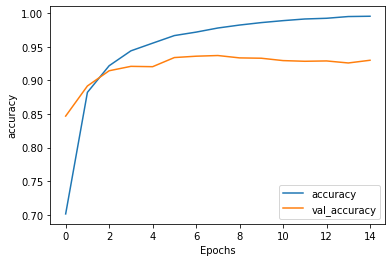

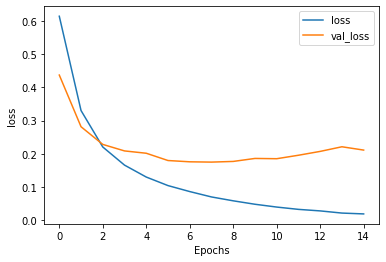

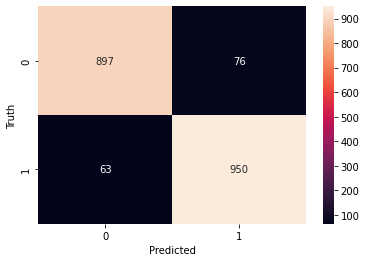

              precision    recall  f1-score   support

       False       0.93      0.92      0.93       973
        True       0.93      0.94      0.93      1013

    accuracy                           0.93      1986
   macro avg       0.93      0.93      0.93      1986
weighted avg       0.93      0.93      0.93      1986

             !!!!!  split number : 3  !!!!!
     In training: Counter({True: 8947, False: 8920})
     In testing: Counter({False: 1006, True: 979})
Epoch 1/15
559/559 - 7s - loss: 0.6189 - accuracy: 0.7018 - precision: 0.7184 - recall: 0.6653 - val_loss: 0.4553 - val_accuracy: 0.8544 - val_precision: 0.8037 - val_recall: 0.9326 - 7s/epoch - 13ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3378 - accuracy: 0.8797 - precision: 0.8806 - recall: 0.8788 - val_loss: 0.3200 - val_accuracy: 0.8615 - val_precision: 0.7983 - val_recall: 0.9622 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2250 - accuracy: 0.9195 - precision: 0.9183 - recall: 0.9212 - val_loss: 0.2317 -

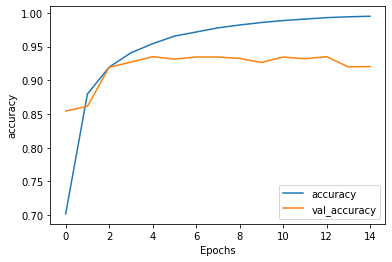

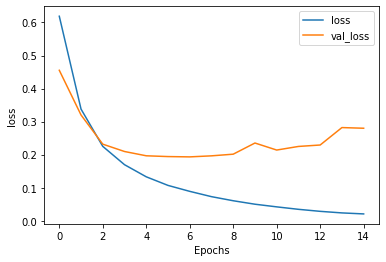

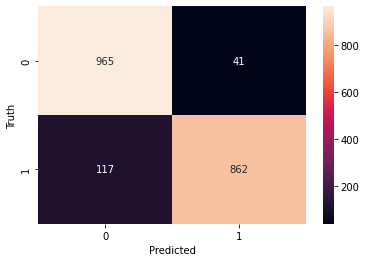

              precision    recall  f1-score   support

       False       0.89      0.96      0.92      1006
        True       0.95      0.88      0.92       979

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 4  !!!!!
     In training: Counter({False: 8949, True: 8918})
     In testing: Counter({True: 1008, False: 977})
Epoch 1/15
559/559 - 7s - loss: 0.6363 - accuracy: 0.6681 - precision: 0.6938 - recall: 0.5998 - val_loss: 0.4878 - val_accuracy: 0.8458 - val_precision: 0.8414 - val_recall: 0.8581 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 5s - loss: 0.3693 - accuracy: 0.8682 - precision: 0.8725 - recall: 0.8619 - val_loss: 0.3129 - val_accuracy: 0.8801 - val_precision: 0.8494 - val_recall: 0.9286 - 5s/epoch - 9ms/step
Epoch 3/15
559/559 - 5s - loss: 0.2456 - accuracy: 0.9143 - precision: 0.9121 - recall: 0.9166 - val_loss: 0.2438 - 

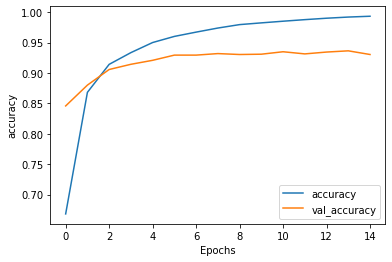

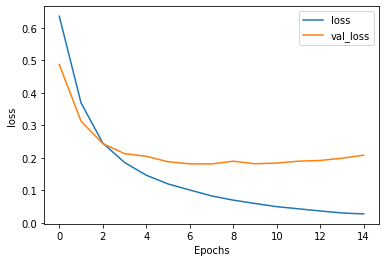

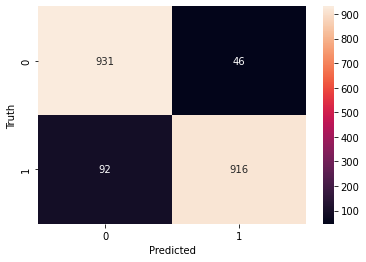

              precision    recall  f1-score   support

       False       0.91      0.95      0.93       977
        True       0.95      0.91      0.93      1008

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

             !!!!!  split number : 5  !!!!!
     In training: Counter({True: 8945, False: 8922})
     In testing: Counter({False: 1004, True: 981})
Epoch 1/15
559/559 - 6s - loss: 0.6135 - accuracy: 0.7110 - precision: 0.7680 - recall: 0.6056 - val_loss: 0.4428 - val_accuracy: 0.8106 - val_precision: 0.8893 - val_recall: 0.7044 - 6s/epoch - 12ms/step
Epoch 2/15
559/559 - 5s - loss: 0.3292 - accuracy: 0.8849 - precision: 0.8842 - recall: 0.8861 - val_loss: 0.2835 - val_accuracy: 0.8902 - val_precision: 0.8484 - val_recall: 0.9470 - 5s/epoch - 9ms/step
Epoch 3/15
559/559 - 5s - loss: 0.2167 - accuracy: 0.9241 - precision: 0.9230 - recall: 0.9257 - val_loss: 0.2345 - 

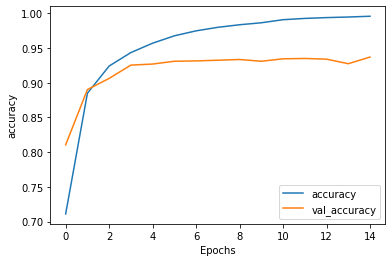

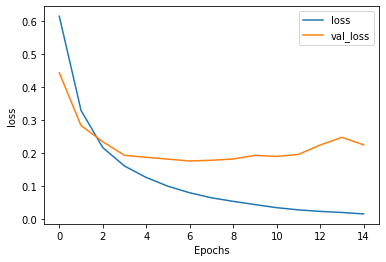

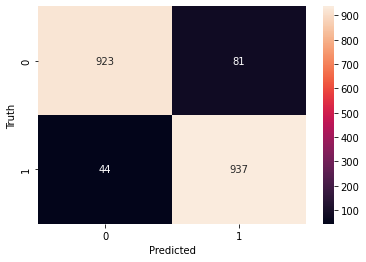

              precision    recall  f1-score   support

       False       0.95      0.92      0.94      1004
        True       0.92      0.96      0.94       981

    accuracy                           0.94      1985
   macro avg       0.94      0.94      0.94      1985
weighted avg       0.94      0.94      0.94      1985

             !!!!!  split number : 6  !!!!!
     In training: Counter({True: 8941, False: 8926})
     In testing: Counter({False: 1000, True: 985})
Epoch 1/15
559/559 - 7s - loss: 0.6433 - accuracy: 0.6702 - precision: 0.7242 - recall: 0.5507 - val_loss: 0.4934 - val_accuracy: 0.8438 - val_precision: 0.8541 - val_recall: 0.8264 - 7s/epoch - 13ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3737 - accuracy: 0.8689 - precision: 0.8728 - recall: 0.8639 - val_loss: 0.2994 - val_accuracy: 0.8977 - val_precision: 0.8856 - val_recall: 0.9117 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2514 - accuracy: 0.9098 - precision: 0.9095 - recall: 0.9103 - val_loss: 0.2461 -

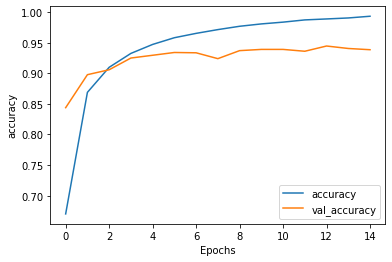

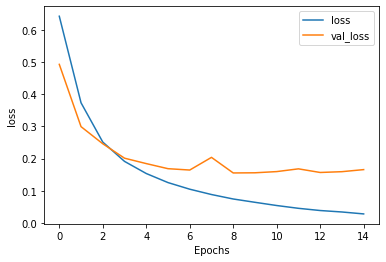

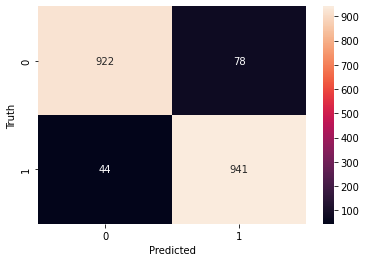

              precision    recall  f1-score   support

       False       0.95      0.92      0.94      1000
        True       0.92      0.96      0.94       985

    accuracy                           0.94      1985
   macro avg       0.94      0.94      0.94      1985
weighted avg       0.94      0.94      0.94      1985

             !!!!!  split number : 7  !!!!!
     In training: Counter({False: 8967, True: 8900})
     In testing: Counter({True: 1026, False: 959})
Epoch 1/15
559/559 - 7s - loss: 0.6329 - accuracy: 0.6656 - precision: 0.7372 - recall: 0.5107 - val_loss: 0.4853 - val_accuracy: 0.8544 - val_precision: 0.8104 - val_recall: 0.9376 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 5s - loss: 0.3622 - accuracy: 0.8698 - precision: 0.8709 - recall: 0.8672 - val_loss: 0.3067 - val_accuracy: 0.8887 - val_precision: 0.9053 - val_recall: 0.8762 - 5s/epoch - 10ms/step
Epoch 3/15
559/559 - 5s - loss: 0.2394 - accuracy: 0.9160 - precision: 0.9144 - recall: 0.9172 - val_loss: 0.2468 -

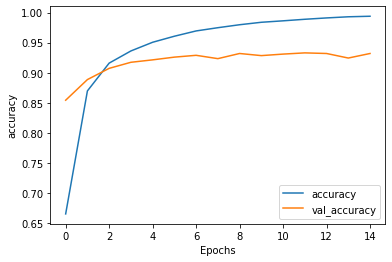

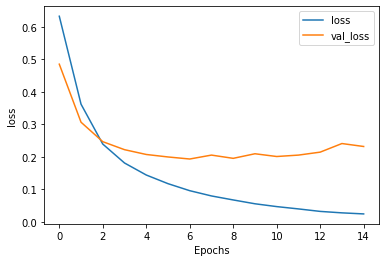

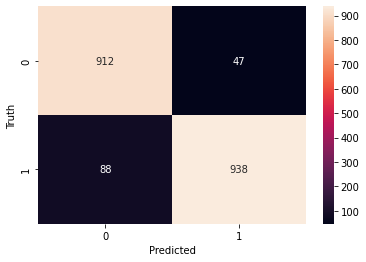

              precision    recall  f1-score   support

       False       0.91      0.95      0.93       959
        True       0.95      0.91      0.93      1026

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

             !!!!!  split number : 8  !!!!!
     In training: Counter({True: 8958, False: 8909})
     In testing: Counter({False: 1017, True: 968})
Epoch 1/15
559/559 - 7s - loss: 0.6338 - accuracy: 0.6799 - precision: 0.6641 - recall: 0.7315 - val_loss: 0.4833 - val_accuracy: 0.8111 - val_precision: 0.8980 - val_recall: 0.6911 - 7s/epoch - 13ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3679 - accuracy: 0.8722 - precision: 0.8744 - recall: 0.8702 - val_loss: 0.3184 - val_accuracy: 0.8791 - val_precision: 0.8256 - val_recall: 0.9535 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2460 - accuracy: 0.9137 - precision: 0.9126 - recall: 0.9155 - val_loss: 0.2376 -

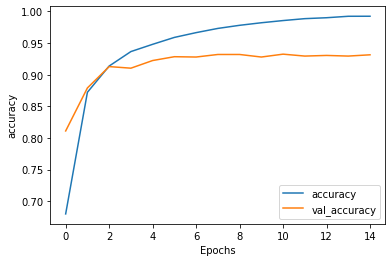

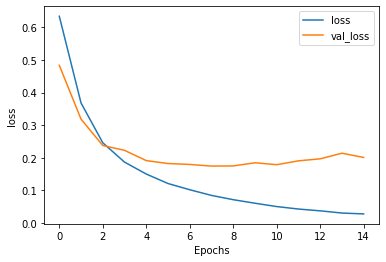

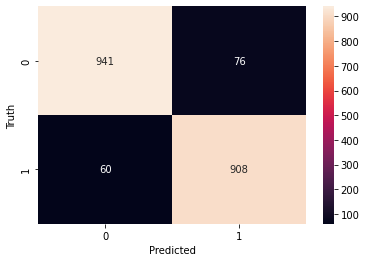

              precision    recall  f1-score   support

       False       0.94      0.93      0.93      1017
        True       0.92      0.94      0.93       968

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

             !!!!!  split number : 9  !!!!!
     In training: Counter({True: 8949, False: 8918})
     In testing: Counter({False: 1008, True: 977})
Epoch 1/15
559/559 - 7s - loss: 0.6228 - accuracy: 0.6818 - precision: 0.6681 - recall: 0.7246 - val_loss: 0.4581 - val_accuracy: 0.8418 - val_precision: 0.8584 - val_recall: 0.8127 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3410 - accuracy: 0.8773 - precision: 0.8801 - recall: 0.8741 - val_loss: 0.2920 - val_accuracy: 0.8912 - val_precision: 0.9026 - val_recall: 0.8731 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 5s - loss: 0.2277 - accuracy: 0.9196 - precision: 0.9186 - recall: 0.9212 - val_loss: 0.2344 -

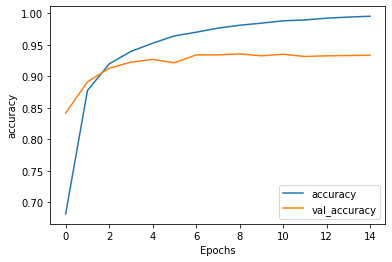

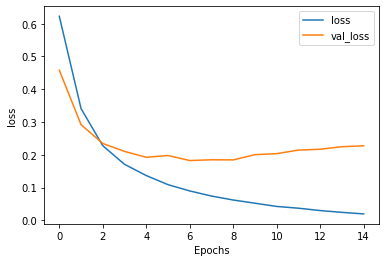

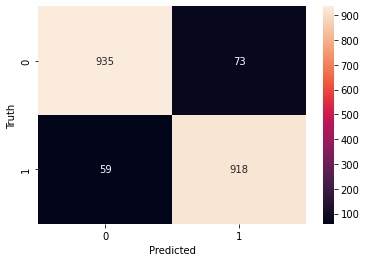

              precision    recall  f1-score   support

       False       0.94      0.93      0.93      1008
        True       0.93      0.94      0.93       977

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

             !!!!!  split number : 10  !!!!!
     In training: Counter({True: 8939, False: 8928})
     In testing: Counter({False: 998, True: 987})
Epoch 1/15
559/559 - 7s - loss: 0.6387 - accuracy: 0.6737 - precision: 0.7395 - recall: 0.5370 - val_loss: 0.5003 - val_accuracy: 0.7798 - val_precision: 0.8819 - val_recall: 0.6434 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3733 - accuracy: 0.8723 - precision: 0.8769 - recall: 0.8664 - val_loss: 0.3064 - val_accuracy: 0.8872 - val_precision: 0.8921 - val_recall: 0.8794 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2463 - accuracy: 0.9143 - precision: 0.9128 - recall: 0.9162 - val_loss: 0.2519 -

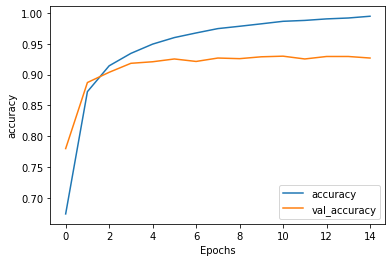

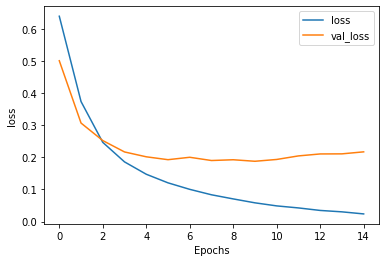

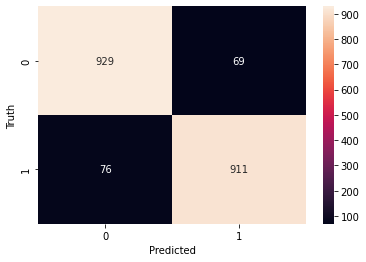

              precision    recall  f1-score   support

       False       0.92      0.93      0.93       998
        True       0.93      0.92      0.93       987

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

mean accuracy for this sub_experiment is 0.93
mean recall for this sub_experiment is 0.93
mean precision for this sub_experiment is 0.94
mean f1_score for this sub_experiment is 0.93
---------------------------------------------------------
                   End of Experiment
---------------------------------------------------------
mean accuracy for this experiment is 0.9
mean recall for this experiment is 0.9
mean precision for this experiment is 0.9
mean f1_score for this experiment is 0.9


In [9]:
 sub_experiment_count = 1
accuracy  = 0
recall    = 0
f1_score  = 0
precision = 0
for dataSet in dataSet_array:
  dataSet_text = dataSet['text']
  dataSet_label = dataSet['label']
  sub_accuracy  = 0
  sub_recall    = 0
  sub_f1_score  = 0
  sub_precision = 0
  print('------------------------------------------------------------')
  #change the maxlen value
  if sub_experiment_count == 1:
    print('!!!!!  sub-experiment with keras sequential model number 1 !!!!!')
    print('!!!!!  dataset used is : article and tweets with cleaning  !!!!!')
    max_length = 2000
  elif sub_experiment_count == 2:
    print('!!!!!  sub-experiment with keras sequential model number 2  !!!!!')
    print('!!!!!  dataset used is : article and tweets without cleaning  !!!!!')
    max_length = 2000
  elif sub_experiment_count == 3:
    print('!!!!!  sub-experiment with keras sequential model number 3  ')
    print('!!!!!  dataset used is : tweets with cleaning  !!!!!')
    max_length = 250
  elif sub_experiment_count == 4:
    print('!!!!!  sub-experiment with keras sequential model number 4  !!!!!')
    print('!!!!!  dataset used is : tweets without cleaning  !!!!!')
    max_length = 250
  print('------------------------------------------------------------')
  
  #cross validation counter
  split = 1
  kfold = KFold(n_splits=10, shuffle=True)

  #cross validation loop
  for train, test in kfold.split(dataSet_text, dataSet_label):
    #create the tokenizer and fit the tokenizer dictionary
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(dataSet_text[train])
    #convert texts to sequences
    training_sequences = tokenizer.texts_to_sequences(dataSet_text[train])
    testing_sequences = tokenizer.texts_to_sequences(dataSet_text[test])
    #make the sequences in the same length
    training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)    
    testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    #convert the vectors to np array
    training_padded = np.array(training_padded)
    training_labels = np.array(dataSet_label[train])
    testing_padded = np.array(testing_padded)
    testing_labels = np.array(dataSet_label[test])

    #some output
    print('             !!!!!  split number : '+ str(split) + '  !!!!!')
    print('     ' + f'In training: {Counter(training_labels)}')
    print('     ' + f'In testing: {Counter(testing_labels)}')

    #create the keras model with 4 layers
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    #create the metrics array
    metrics_array = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    #compile the model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=metrics_array)

    #model training with 15 epochs
    history = model.fit(training_padded, training_labels, epochs=15, validation_data=(testing_padded, testing_labels), verbose=2)

    #call the method plot_graphs for some statistic
    plot_graphs(history, "accuracy")
    plot_graphs(history, "loss")
    
    # testing the model
    lable_predicted = model.predict(testing_padded)
    lable_predicted = lable_predicted.flatten()
    lable_predicted = np.where(lable_predicted > 0.5, 1, 0)

    # create and show the confusion matrix
    cm = metrics.confusion_matrix(testing_labels, lable_predicted)
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    
    #show the classification report 
    print(metrics.classification_report(testing_labels, lable_predicted))

    #add the new metrics result from the new cross val. to the old  metrics result from the old cross val.
    sub_accuracy  = sub_accuracy + metrics.accuracy_score(testing_labels, lable_predicted)
    sub_recall    = sub_recall + metrics.recall_score(testing_labels, lable_predicted)
    sub_f1_score  = sub_f1_score + metrics.f1_score(testing_labels, lable_predicted)
    sub_precision = sub_precision + metrics.precision_score(testing_labels, lable_predicted)

    #indexing
    split = split + 1
  #compute the mean of the using metrics in the cross val.
  sub_accuracy  = sub_accuracy / 10
  sub_recall    = sub_recall / 10
  sub_f1_score  = sub_f1_score / 10
  sub_precision = sub_precision / 10

  #some output
  print("mean accuracy for this sub_experiment is " + str(round(sub_accuracy, 2)))
  print("mean recall for this sub_experiment is " + str(round(sub_recall, 2)))
  print("mean precision for this sub_experiment is " + str(round(sub_precision, 2)))
  print("mean f1_score for this sub_experiment is " + str(round(sub_f1_score, 2)))

  #add the new metrics result from the new sub experiment to the old  metrics result from the old sub experiments
  accuracy  = accuracy + sub_accuracy
  recall    = recall + sub_recall
  precision = precision + sub_precision
  f1_score  = f1_score + sub_f1_score

  #indexing
  sub_experiment_count = sub_experiment_count + 1
  
  

#compute the mean of the using metrics for the 4 sub experiments.
accuracy  = accuracy / 4
recall    = recall / 4
f1_score  = f1_score / 4
precision = precision / 4

#some output
print('---------------------------------------------------------')
print('                   End of Experiment')
print('---------------------------------------------------------')

print("mean accuracy for this experiment is " + str(round(accuracy, 2)))
print("mean recall for this experiment is " + str(round(recall, 2)))
print("mean precision for this experiment is " + str(round(precision, 2)))
print("mean f1_score for this experiment is " + str(round(f1_score, 2)))

In [26]:
#model description
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_40 (Embedding)    (None, 250, 18)           810000    
                                                                 
 global_average_pooling1d_40  (None, 18)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_80 (Dense)            (None, 24)                456       
                                                                 
 dense_81 (Dense)            (None, 1)                 25        
                                                                 
Total params: 810,481
Trainable params: 810,481
Non-trainable params: 0
_________________________________________________________________
